Importing the required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GEN_AI-Intern/Classification/drug200.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   NAK          200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
dataset.head()

,Age,Sex,BP,Cholesterol,NAK,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Univariate analysis - Visualization

In [ ]:
a = ['Sex', 'BP', 'Cholesterol', 'Drug']
b = ['Age', 'NAK']

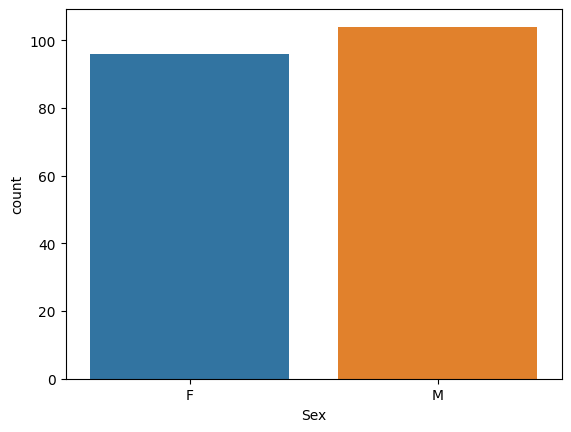

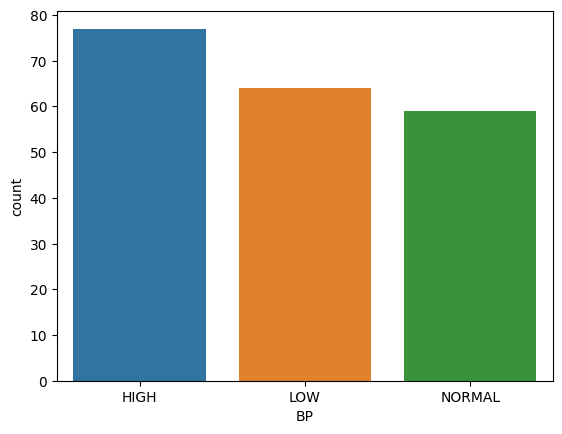

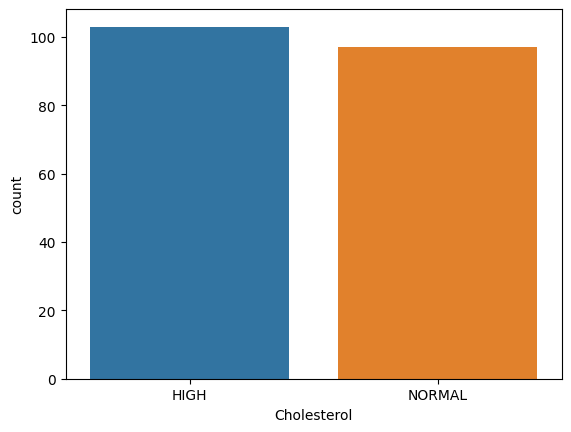

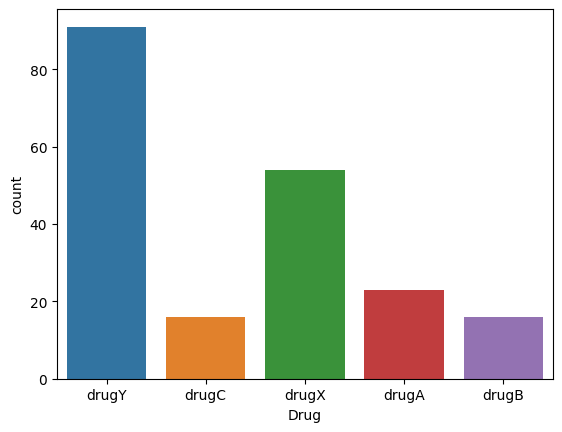

In [ ]:
for i in a:
  sns.countplot(x=dataset[i])
  plt.show()

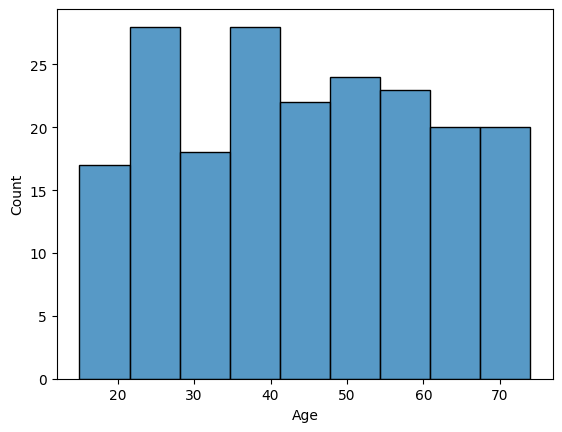

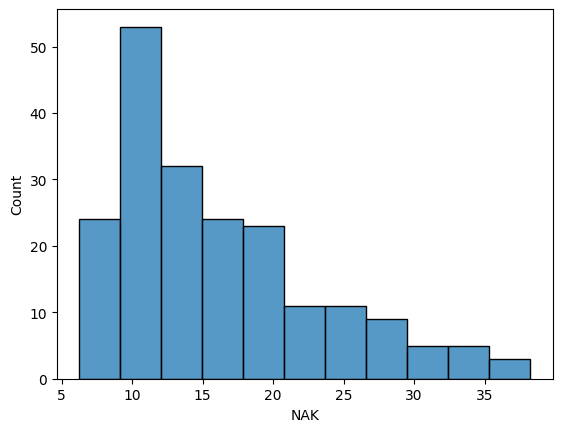

In [ ]:
for i in b:
  sns.histplot(dataset[i])
  plt.show()

Bi-variate analysis - Visualization

In [ ]:
dataset.head()

,Age,Sex,BP,Cholesterol,NAK,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


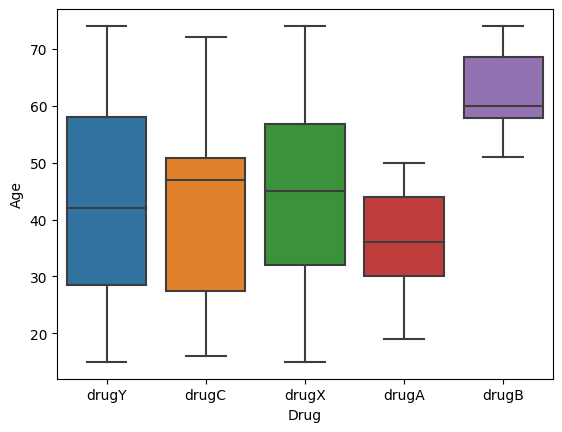

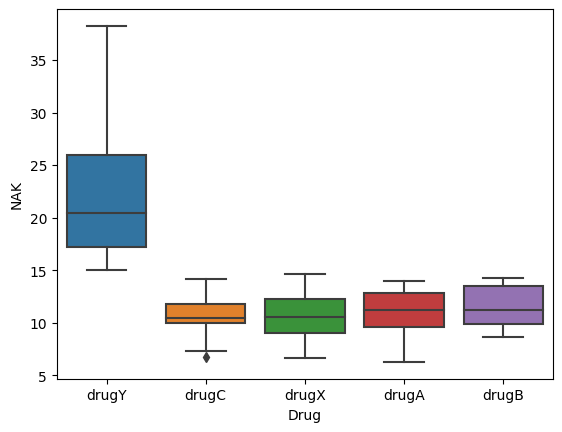

In [ ]:
for i in b:
  sns.boxplot(x=dataset['Drug'], y=dataset[i])
  plt.show()

Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
gender_encoder = LabelEncoder()

In [ ]:
bp_encoder = OneHotEncoder()
cho_encoder = OneHotEncoder()

In [ ]:
drug_encoder = OneHotEncoder()

In [ ]:
dataset['Sex'] = gender_encoder.fit_transform(dataset['Sex'])

In [ ]:
dataset.head(2)

,Age,Sex,BP,Cholesterol,NAK,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC


In [ ]:
bp_data = bp_encoder.fit_transform(dataset[['BP']])
bp_data = pd.DataFrame(bp_data.toarray(), columns=bp_encoder.get_feature_names_out())
dataset1 = pd.concat([dataset, bp_data], axis='columns')

In [ ]:
bp_data

,BP_HIGH,BP_LOW,BP_NORMAL
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
195,0.0,1.0,0.0
196,0.0,1.0,0.0
197,0.0,0.0,1.0
198,0.0,0.0,1.0


In [ ]:
cho_data = cho_encoder.fit_transform(dataset[['Cholesterol']])
cho_data = pd.DataFrame(cho_data.toarray(), columns=cho_encoder.get_feature_names_out())
dataset2 = pd.concat([dataset1, cho_data], axis='columns')

In [ ]:
dataset2

,Age,Sex,BP,Cholesterol,NAK,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,HIGH,HIGH,25.355,drugY,1.0,0.0,0.0,1.0,0.0
1,47,1,LOW,HIGH,13.093,drugC,0.0,1.0,0.0,1.0,0.0
2,47,1,LOW,HIGH,10.114,drugC,0.0,1.0,0.0,1.0,0.0
3,28,0,NORMAL,HIGH,7.798,drugX,0.0,0.0,1.0,1.0,0.0
4,61,0,LOW,HIGH,18.043,drugY,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC,0.0,1.0,0.0,1.0,0.0
196,16,1,LOW,HIGH,12.006,drugC,0.0,1.0,0.0,1.0,0.0
197,52,1,NORMAL,HIGH,9.894,drugX,0.0,0.0,1.0,1.0,0.0
198,23,1,NORMAL,NORMAL,14.020,drugX,0.0,0.0,1.0,0.0,1.0


Droping the dummy variables (OneHotEncoding)

In [ ]:
dataset2.head()

,Age,Sex,BP,Cholesterol,NAK,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,HIGH,HIGH,25.355,drugY,1.0,0.0,0.0,1.0,0.0
1,47,1,LOW,HIGH,13.093,drugC,0.0,1.0,0.0,1.0,0.0
2,47,1,LOW,HIGH,10.114,drugC,0.0,1.0,0.0,1.0,0.0
3,28,0,NORMAL,HIGH,7.798,drugX,0.0,0.0,1.0,1.0,0.0
4,61,0,LOW,HIGH,18.043,drugY,0.0,1.0,0.0,1.0,0.0


In [ ]:
dataset2 = dataset2.drop(['BP', 'Cholesterol'], axis='columns')

In [ ]:
dataset2.head()

,Age,Sex,NAK,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,25.355,drugY,1.0,0.0,0.0,1.0,0.0
1,47,1,13.093,drugC,0.0,1.0,0.0,1.0,0.0
2,47,1,10.114,drugC,0.0,1.0,0.0,1.0,0.0
3,28,0,7.798,drugX,0.0,0.0,1.0,1.0,0.0
4,61,0,18.043,drugY,0.0,1.0,0.0,1.0,0.0


Separating the input and output

In [ ]:
x = dataset2.drop('Drug', axis='columns')
y = dataset2[['Drug']]

In [ ]:
print(x)

     Age  Sex     NAK  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
0     23    0  25.355      1.0     0.0        0.0               1.0   
1     47    1  13.093      0.0     1.0        0.0               1.0   
2     47    1  10.114      0.0     1.0        0.0               1.0   
3     28    0   7.798      0.0     0.0        1.0               1.0   
4     61    0  18.043      0.0     1.0        0.0               1.0   
..   ...  ...     ...      ...     ...        ...               ...   
195   56    0  11.567      0.0     1.0        0.0               1.0   
196   16    1  12.006      0.0     1.0        0.0               1.0   
197   52    1   9.894      0.0     0.0        1.0               1.0   
198   23    1  14.020      0.0     0.0        1.0               0.0   
199   40    0  11.349      0.0     1.0        0.0               0.0   

     Cholesterol_NORMAL  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                

In [ ]:
y = drug_encoder.fit_transform(y)
y = pd.DataFrame(y.toarray(),columns=drug_encoder.get_feature_names_out())

In [ ]:
y.head()

,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


Splitting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x.shape)
print(y.shape)

(200, 8)
(200, 5)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(160, 8)
(160, 5)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(40, 8)
(40, 5)


Building the ANN-classification model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 3,255
Trainable params: 3,255
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
x_train.head()

,Age,Sex,NAK,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
8,60,1,15.171,0.0,0.0,1.0,1.0,0.0
104,22,1,28.294,1.0,0.0,0.0,0.0,1.0
91,41,1,15.156,1.0,0.0,0.0,0.0,1.0
71,28,0,19.675,0.0,0.0,1.0,1.0,0.0
96,58,0,38.247,0.0,1.0,0.0,1.0,0.0


In [ ]:
x_train.shape

(160, 8)

In [ ]:
model.fit(x_train.values, y_train.values, epochs=2500)

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 2s 8ms/step - loss: 5.8101 - accuracy: 0.0437
Epoch 2/2500
5/5 [==============================] - 0s 7ms/step - loss: 2.9451 - accuracy: 0.3313
Epoch 3/2500
5/5 [==============================] - 0s 5ms/step - loss: 1.7486 - accuracy: 0.4812
Epoch 4/2500
5/5 [==============================] - 0s 5ms/step - loss: 1.8264 - accuracy: 0.4563
Epoch 5/2500
5/5 [==============================] - 0s 4ms/step - loss: 1.4178 - accuracy: 0.5188
Epoch 6/2500
5/5 [==============================] - 0s 5ms/step - loss: 1.2868 - accuracy: 0.4437
Epoch 7/2500
5/5 [==============================] - 0s 5ms/step - loss: 1.2276 - accuracy: 0.5188
Epoch 8/2500
5/5 [==============================] - 0s 6ms/step - loss: 1.1321 - accuracy: 0.5875
Epoch 9/2500
5/5 [==============================] - 0s 5ms/step - loss: 1.0985 - accuracy: 0.5875
Epoch 10/2500
5/5 [==============================] - 0s 4ms/step - loss: 1.0830 

Predicting the y_pred

In [ ]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


Saving the model and encoders

In [ ]:
import joblib

model.save('ann-class.h5')
joblib.dump(gender_encoder, 'gender_encoder.pkl')
joblib.dump(drug_encoder, 'drug_encoder.pkl')
joblib.dump(cho_encoder, 'cho_encoder.pkl')
joblib.dump(bp_encoder, 'bp_encoder.pkl')

['bp_encoder.pkl']

Creating the local host application using Flask (run it in spyder)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 19 20:47:39 2023

@author: Ramkumar
"""

from flask import Flask, request
from tensorflow.keras.models import load_model
#from sklearn.preprocessing import LabelEncoder
import joblib

model = load_model("c:/Users/Ramkumar/Downloads/ann-class.h5")
drug_encoder = joblib.load('c:/Users/Ramkumar/Downloads/drug_encoder.pkl')

app = Flask(__name__)
@app.route('/', methods=['POST'])

def prediction():
    data = request.get_json(force=True)
    data = data['test']
    print('data')
    pred = model.predict(data)
    result = drug_encoder.inverse_transform(pred)
    print(result)

    return [result[0][0]]

app.run(host='0.0.0.0')

Requesting the locally hosted model (run it on vscode)

In [ ]:
import requests
url = 'http://127.0.0.1:5000'
data = {'test': [[60,	1,	15.171,	0.0,	0.0,	1.0,	1.0,	0.0]]}

import json
data = json.dumps(data)

request = requests.post(url, data)
print(request.content)

ConnectionError: ignored